In [55]:
import pandas as pd
pd.set_option('display.max_rows', 999)

hinc = pd.read_csv("household-income-in-the-past-12-months-in-2015-inflation-adjusted-dollars.csv")
hinc.drop(hinc[hinc["Estimate; Total:"] < 50].index, inplace=True)

hinc.head()

,Neighborhood,Id,Estimate; Total:,Margin of Error; Total:,"Estimate; Total: - Less than $10,000","Margin of Error; Total: - Less than $10,000","Estimate; Total: - $10,000 to $14,999","Margin of Error; Total: - $10,000 to $14,999","Estimate; Total: - $15,000 to $19,999","Margin of Error; Total: - $15,000 to $19,999",...,"Estimate; Total: - $75,000 to $99,999","Margin of Error; Total: - $75,000 to $99,999","Estimate; Total: - $100,000 to $124,999","Margin of Error; Total: - $100,000 to $124,999","Estimate; Total: - $125,000 to $149,999","Margin of Error; Total: - $125,000 to $149,999","Estimate; Total: - $150,000 to $199,999","Margin of Error; Total: - $150,000 to $199,999","Estimate; Total: - $200,000 or more","Margin of Error; Total: - $200,000 or more"
0,Allegheny Center,1,870.0,93.000000,147.0,57.000000,115.0,54.000000,30.0,21.000000,...,73.0,39.000000,26.0,18.000000,25.0,25.000000,12.0,17.000000,21.0,21.000000
1,Allegheny West,2,146.0,36.000000,0.0,10.000000,3.0,7.000000,4.0,6.000000,...,11.0,10.000000,20.0,17.000000,0.0,10.000000,9.0,13.000000,21.0,24.000000
2,Allentown,3,1069.0,132.457540,190.0,82.134037,78.0,42.825226,78.0,80.305666,...,36.0,32.015621,31.0,42.941821,14.0,27.856777,0.0,17.320508,3.0,16.248077
3,Arlington,4,701.0,104.465305,70.0,42.497059,35.0,26.870058,56.0,29.086079,...,141.0,54.212545,23.0,17.804494,6.0,16.248077,7.0,17.320508,2.0,15.000000
4,Arlington Heights,5,144.0,59.000000,48.0,42.000000,23.0,27.000000,43.0,52.000000,...,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000


This first dataset uses buckets to describe household income, so I will need to come up with some way to turn this collection of split up data into a single score for each county.

Here, I decided to conservatively count each bucket as being numerically equivalent to its lower bound. For example, all households surveyed that were placed in the bucket for 15,000 to 19,999 will be counted as making 15,000 annually. This is because of the final bucket, which has no upper bound. So each county's score will be (the sum of the values in each relevant column times that column's bucket's lower bound) divided by the number of households in that neighborhood that were sampled.

In [56]:
columnincomedict = {"col": [4 + 2 * i for i in range(16)], "income":
                   [0, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 75, 100, 125, 150, 200]}

nbscoreshinc = pd.DataFrame({"neighborhood": [], "score": []})

for i in range(len(hinc.index)):
    neighborhood = hinc.iloc[i, 0]
    
    score = 0
    for j in range(16):
        rowindex = columnincomedict["col"][j]
        indexincome = columnincomedict["income"][j]
        score += (hinc.iloc[i, rowindex] * indexincome)
        
    score /= hinc.iloc[i, 2]
        
    nbscoreshinc.loc[i] = {"neighborhood": neighborhood, "score": score}

nbscoreshinc.head()

,neighborhood,score
0,Allegheny Center,40.758621
1,Allegheny West,75.582192
2,Allentown,31.693171
3,Arlington,44.065621
4,Arlington Heights,13.090278


Doing exactly what we wanted! Let's sort and visualize the data now:

In [57]:
sortedhinc = nbscoreshinc.sort_values(by=["score"], ascending=False)

sortedhinc.head()

,neighborhood,score
74,Squirrel Hill North,103.351632
78,Strip District,96.432692
62,Point Breeze,96.161401
65,Regent Square,86.680672
16,Central Business District,78.036077


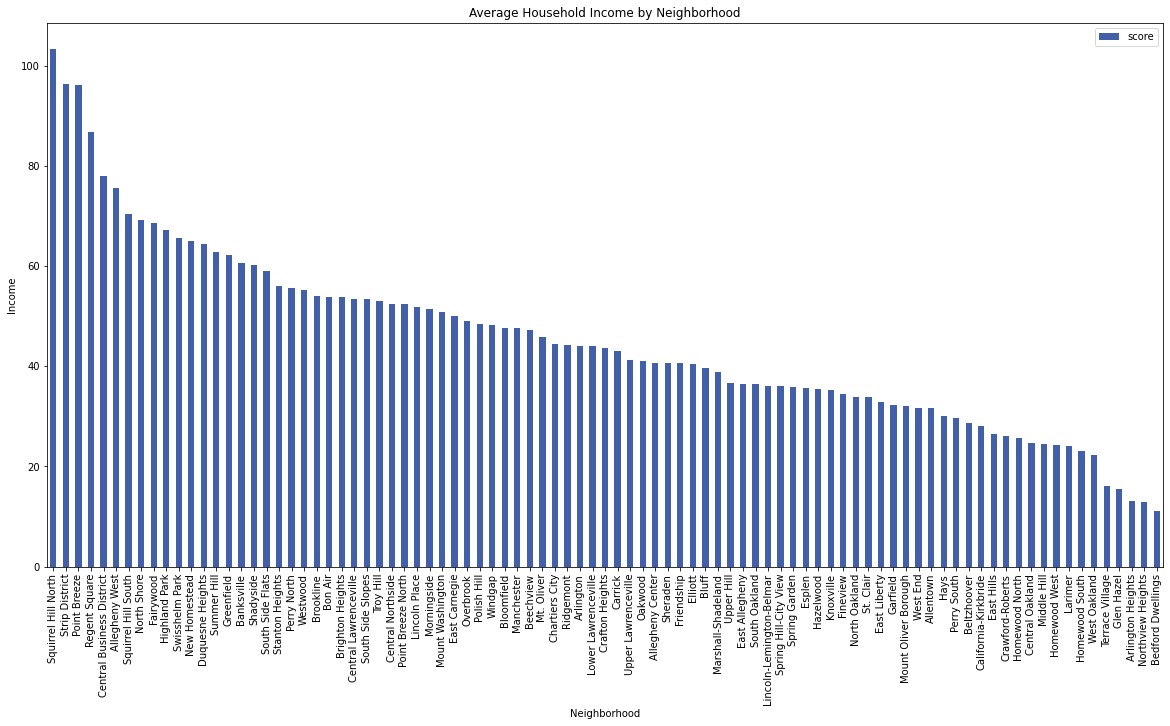

In [58]:
sortedhinc.plot.bar(x="neighborhood", xlabel="Neighborhood", ylabel="Income", color="#425faa",
                    rot=90, figsize=(20,10), title="Average Household Income by Neighborhood")

It looks like Squirrel Hill North, the Strip District, and Point Breeze are our top 3. Let's add the data for educational attainment to further see how money and education are linked.

In [59]:
edu = pd.read_csv("educational-attainment-for-the-population-25-years-and-over.csv")

edu.drop(edu[edu["Estimate; Total:"] < 50].index, inplace=True)

edu.head()

,Neighborhood,Id,Estimate; Total:,Margin of Error; Total:,Estimate; Total: - No schooling completed,Margin of Error; Total: - No schooling completed,Estimate; Total: - Nursery school,Margin of Error; Total: - Nursery school,Estimate; Total: - Kindergarten,Margin of Error; Total: - Kindergarten,...,Estimate; Total: - Associate's degree,Margin of Error; Total: - Associate's degree,Estimate; Total: - Bachelor's degree,Margin of Error; Total: - Bachelor's degree,Estimate; Total: - Master's degree,Margin of Error; Total: - Master's degree,Estimate; Total: - Professional school degree,Margin of Error; Total: - Professional school degree,Estimate; Total: - Doctorate degree,Margin of Error; Total: - Doctorate degree
0,Allegheny Center,1,1002.0,139.000000,10.0,14.000000,0.0,10.000000,0.0,10.000000,...,87.0,52.000000,274.0,77.000000,80.0,46.000000,125.0,66.000000,8.0,11.000000
1,Allegheny West,2,293.0,72.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,...,16.0,10.000000,88.0,34.000000,33.0,29.000000,27.0,31.000000,20.0,26.000000
2,Allentown,3,1577.0,227.187148,19.0,27.000000,0.0,17.320508,0.0,17.320508,...,54.0,34.871192,70.0,42.626283,35.0,29.529646,22.0,29.597297,0.0,17.320508
3,Arlington,4,1296.0,218.515446,31.0,32.878564,0.0,17.320508,0.0,17.320508,...,147.0,59.405387,94.0,43.127717,25.0,22.158520,4.0,15.779734,0.0,17.320508
4,Arlington Heights,5,121.0,63.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,...,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000


This data set has a similar bucketing system to the household income set, so the method to create scores will be similar. I decided to use a system where each level of educational attainment maps to the approximate number of years required to have attained that level of education.

In the dictionary below, they are mapped as they were above. The 'difficult' decisions:
-  Getting diploma at end of HS adds a year over not getting one
-  < 1yr college is assumed to be 1/2yr college
-  \> 1yr college, no degree is assumed to be 2yr college
-  Master's assumed to take 2yr
-  Professional degree and doctorate assumed to take 6yr and be completed without having gotten a Master's

In [60]:
columnyearsdict = {"col": [4 + 2 * i for i in range(24)], "years":
                   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 15, 15.5, 17, 17, 19, 21, 25, 25]}

Now we can find each county's score (same process as before):

In [63]:
nbscoresedu = pd.DataFrame({"neighborhood": [], "score": []})

for i in range(len(edu.index)):
    neighborhood = edu.iloc[i, 0]
    
    score = 0
    for j in range(23):
        rowindex = columnyearsdict["col"][j]
        indexyears = columnyearsdict["years"][j]
        score += (edu.iloc[i, rowindex] * indexyears)
        
    score /= edu.iloc[i, 2]
        
    nbscoresedu.loc[i] = {"neighborhood": neighborhood, "score": score}

nbscoresedu.head()

,neighborhood,score
0,Allegheny Center,17.987525
1,Allegheny West,16.883959
2,Allentown,15.510780
3,Arlington,15.378086
4,Arlington Heights,14.140496


In [69]:
sortededu = nbscoresedu.sort_values(by=["score"], ascending=False)

sortededu.head()

,neighborhood,score
78,Strip District,18.451754
65,Regent Square,18.377193
56,North Shore,18.295322
16,Central Business District,18.230104
0,Allegheny Center,17.987525


Let's quickly look at the bar graph and then combine the two data frames into a single one:

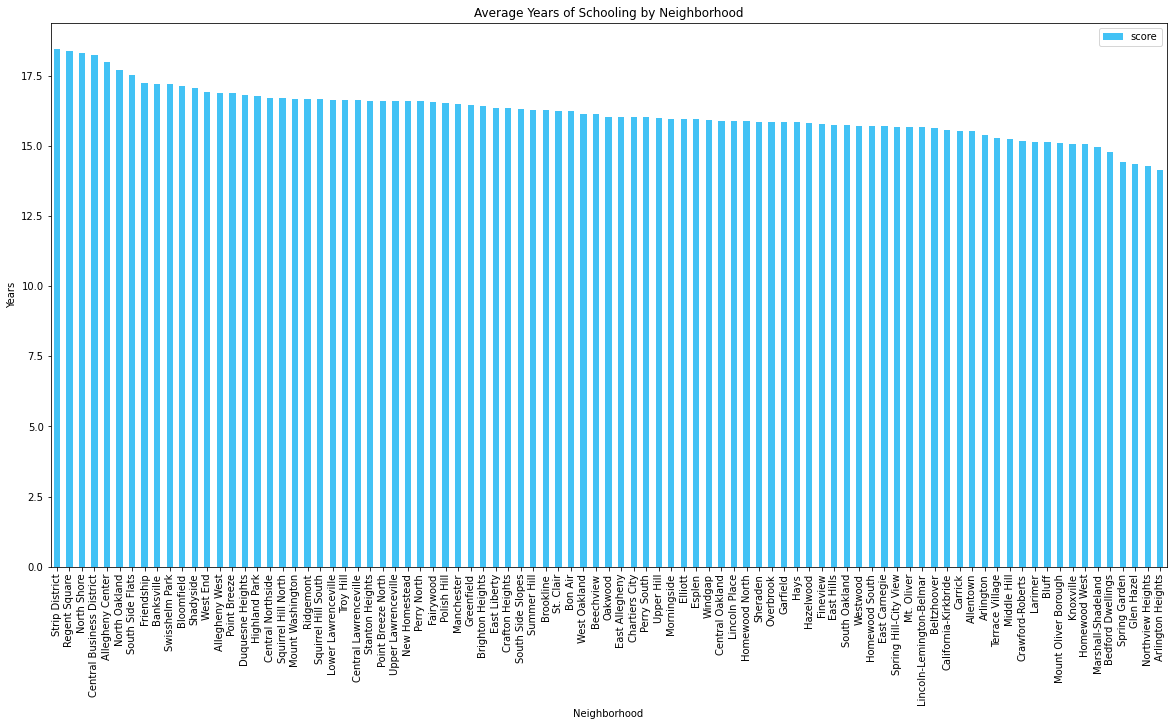

In [66]:
sortededu.plot.bar(x="neighborhood", xlabel="Neighborhood", ylabel="Years", color="#42c2f5",
                    rot=90, figsize=(20,10), title="Average Years of Schooling by Neighborhood")

In [71]:
nbscores = pd.DataFrame({"neighborhood": [], "hinc_score": [], "edu_score": []})
nbscores["neighborhood"] = nbscoreshinc["neighborhood"]
nbscores["hinc_score"] = nbscoreshinc["score"]
nbscores["edu_score"] = nbscoresedu["score"]

nbscores.head()

,neighborhood,hinc_score,edu_score
0,Allegheny Center,40.758621,17.987525
1,Allegheny West,75.582192,16.883959
2,Allentown,31.693171,15.510780
3,Arlington,44.065621,15.378086
4,Arlington Heights,13.090278,14.140496


We can now plot both the scores for household income and educational attainment together. Let's see what that looks like...

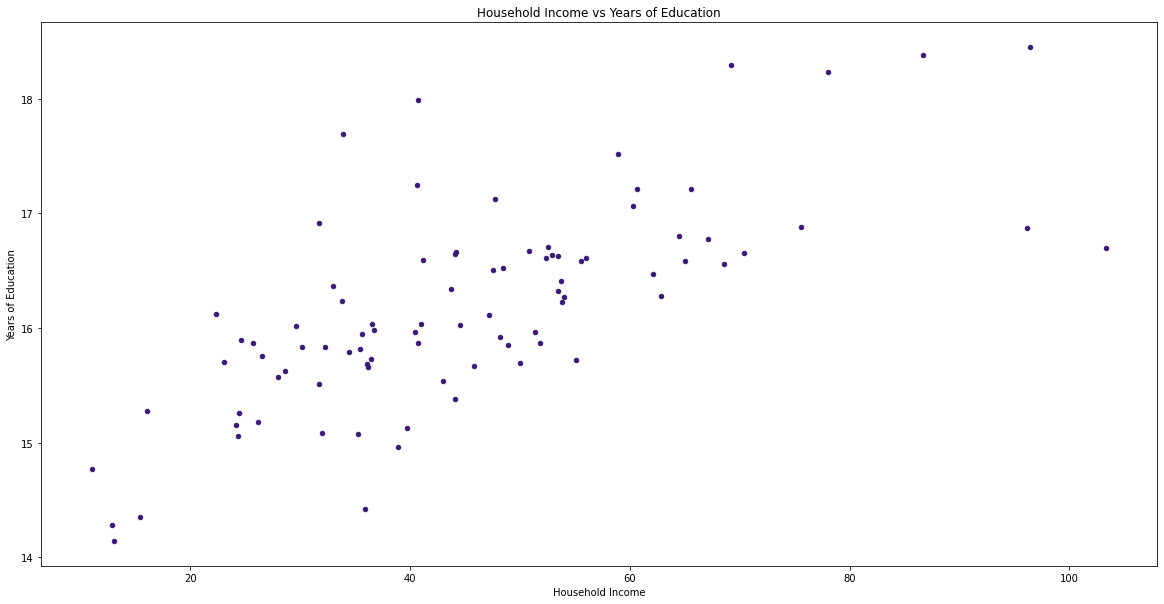

In [78]:
nbscores.plot.scatter(x="hinc_score", y="edu_score", xlabel="Household Income", ylabel="Years of Education", 
                      color="#3a1a78", figsize=(20,10), title="Household Income vs Years of Education")

Seeing this graph, there is a clear positive correlation. However, it is difficult to decide which neighborhood is best because the neighborhood with the highest in either metric are not in the top five of the other metric. The Strip District seems like a clear winner, but to formalize both metrics into one, I have decided to use the formula

overall_score = (hinc_score/max_hinc_score + edu_score/max_edu_score) / 2 

to find each neighborhood's average standing in comparison to the best of each category.

Let's apply this formula and look at the results:

In [79]:
max_hinc_score = nbscores["hinc_score"].max()
max_edu_score = nbscores["edu_score"].max()

nbscores["overall_score"] = ((nbscores["hinc_score"] / max_hinc_score) + 
                                (nbscores["edu_score"] / max_edu_score)) / 2

sortednbscores = nbscores.sort_values(by=["overall_score"], ascending=False)
sortednbscores.head()

,neighborhood,hinc_score,edu_score,overall_score
78,Strip District,96.432692,18.451754,0.966527
74,Squirrel Hill North,103.351632,16.699211,0.952510
62,Point Breeze,96.161401,16.876123,0.922519
65,Regent Square,86.680672,18.377193,0.917328
16,Central Business District,78.036077,18.230104,0.871521


In the end, it is in fact the Strip District. Considering household income and educational attainment, the Strip District wins. By this metric, it is the happiest neighborhood in Pittsburgh.